# KNN Algoritması 
* Dataset import etme
* Datasetimi tanıma
* Dataset Görselleştirme
* KNN Algoritması ne demek açıkla
* Sklearn ile KNN

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [29]:
data = pd.read_csv("data.csv")

In [30]:
data.head()
# M = Malignant (Kötü Huylu Tumor)
# B = Benign (İyi Huylu Tumor)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
# id ve Unnamed: 32 'den  kurtulmak için
data.drop(["id","Unnamed: 32" ], axis=1, inplace=True)
data.tail()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [32]:
M = data[data.diagnosis == "M"]
B = data [data.diagnosis == "B"]

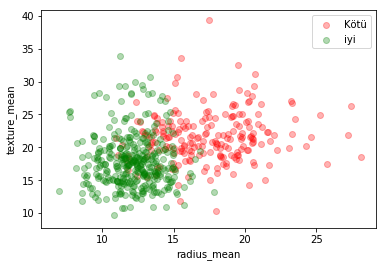

In [33]:
# Scatter plot
plt.scatter(M.radius_mean, M.texture_mean, color="red", label = "Kötü", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color="green", label = "iyi", alpha = 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean") 
plt.legend()
plt.show()


# KNN = K Neireset Neighbour (K en yakın komşu)
1) K değerini seç <br>
2) K en yakın data noktalarını bul <br>
3) K en yakın komşu arasında hangi classan kaç tane var hesapla <br>
4) Test ettiğimiz point yada data hangi classa ait tespit et  <br>
#### *** Dipnot:*** KNN 'de en önemli şey normalizasyon yapmaktır.

Örnek verecek olursak resimde de görüldüğü üzere bir tane nokta belirleyelim x=20, y=30 olsun. Şimdi sırasıyla;<br>
1) K = 3 diyelim <br>
2) K'ya ait yakın noktalarını bulalım<br>
3) Kötü = 3 ve iyi = 0 <br>
4) Kötü olduğunu görebiliyoruz.<br>
<br>

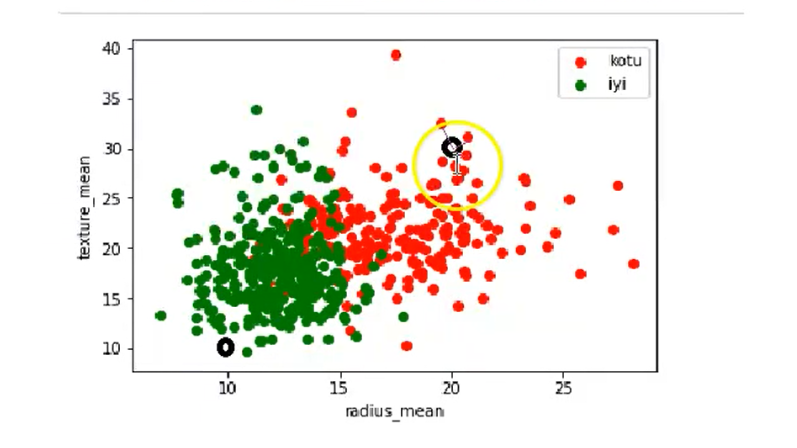

İkinci bir örnek verecek olursak resimde de görüldüğü üzere bir tane nokta belirleyelim x=10, y=10 olsun. Şimdi sırasıyla;<br>
1) K = 5 diyelim <br>
2) K'ya ait yakın noktalarını bulalım<br>
3) Kötü = 0 ve iyi = 5 <br>
4) iyi olduğunu görebiliyoruz.<br>
<br>

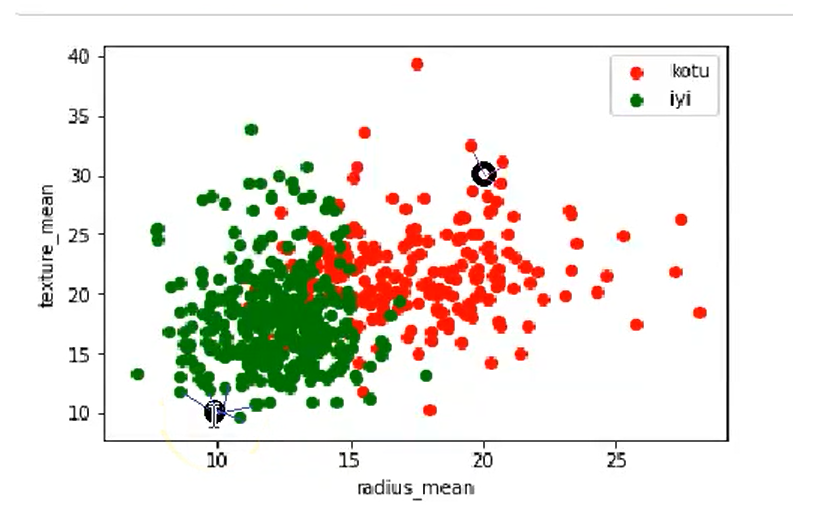

Üçüncü bir örnek verecek olursak resimde de görüldüğü üzere bir tane nokta belirleyelim. Şimdi sırasıyla;
1) K = 4 diyelim
2) K'ya ait yakın noktalarını bulalım
3) Kötü = 1 ve iyi = 3
4) iyi olduğunu görebiliyoruz.

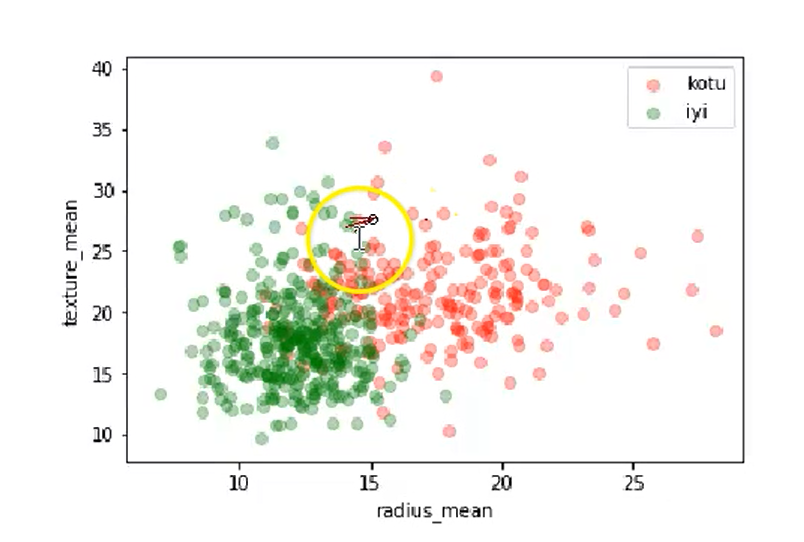

# Euclidean distance


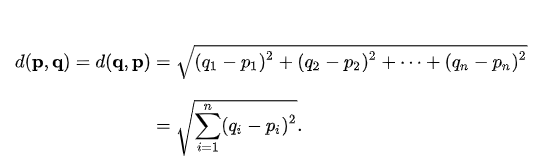


KNN Python 

In [34]:
data.diagnosis = [ 1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"], axis=1)

In [35]:
x_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [40]:
print(x)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.521037      0.022658        0.545989   0.363733         0.593753   
1       0.643144      0.272574        0.615783   0.501591         0.289880   
2       0.601496      0.390260        0.595743   0.449417         0.514309   
3       0.210090      0.360839        0.233501   0.102906         0.811321   
4       0.629893      0.156578        0.630986   0.489290         0.430351   
5       0.258839      0.202570        0.267984   0.141506         0.678613   
6       0.533343      0.347311        0.523875   0.380276         0.379164   
7       0.318472      0.376057        0.320710   0.184263         0.598267   
8       0.284869      0.409537        0.302052   0.159618         0.674099   
9       0.259312      0.484613        0.277659   0.140997         0.595558   
10      0.427801      0.457558        0.407090   0.277540         0.265686   
11      0.416442      0.276632        0.413309   0.270414       

## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [49]:
## KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [44]:
prediction

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [50]:
# Score'muzu bulalım x tane predict ettiğimizden % kaç tanesini doğru tahmin ettik
print("{} nn score : {}".format(3, knn.score(x_test,y_test)))

3 nn score : 0.9532163742690059


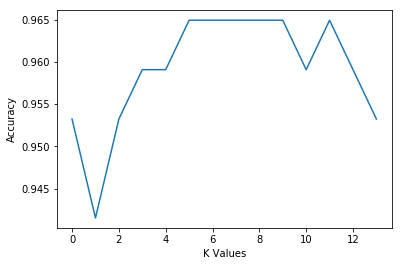

In [53]:
# K değerini nasıl seçeceğiz peki 
score_list = []
for i in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()
    

# Conclusion

## K değeri 5 ile 9 arasında ki değerde en doğru Accuracy değerini verecek.